<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><FONT FACE="times new roman" SIZE=5>
<br><i><b>Docente:</b></i> Darwin Martinez
<br><i><b>Asignatura:</b></i> Procesamiento de imagenes
<br><i><b>Tema:</b></i> Histogramas
<br><i><b>Estudiante: </b></i> Juan Esteban Arias Patrón
</FONT>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos las bibliotecas necesarias para el programa
import PIL
import cv2
import math
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

<FONT FACE="times new roman" SIZE=4>
<h1><b>Abrir una imagen</b></h1>
A continuación se visualizará una imagen mediante el uso del modulo <i>Image</i> el cual es extraido de la biblioteca <i>PIL</i>, específicamente diseñada para el procesamiento de imagenes, adicional a esto proporciona herramientas para abrir, guardar, rotar, escalar y recortar todo tipo de imagenes.
</FONT>

In [ ]:
# Se carga la imagen directamente desde Google Drive
url = '/content/drive/MyDrive/Colab Notebooks/Procesamiento de Imagenes/harbour512x512.tif'
img = Image.open(url)

<FONT FACE="times new roman" SIZE=4>
<h1><b>Descripción de la imagen</b></h1>
Vamos a indicar el tamaño y numero de canales con el que cuenta la imagen
</FONT>

In [ ]:
print(f"Tamaño de la imagen es: {np.asarray(img).shape[1]} x {np.asarray(img).shape[0]}")
print(f"Canales de la imagen: {img.mode}")

Tamaño de la imagen es: 512 x 512
Canales de la imagen: L


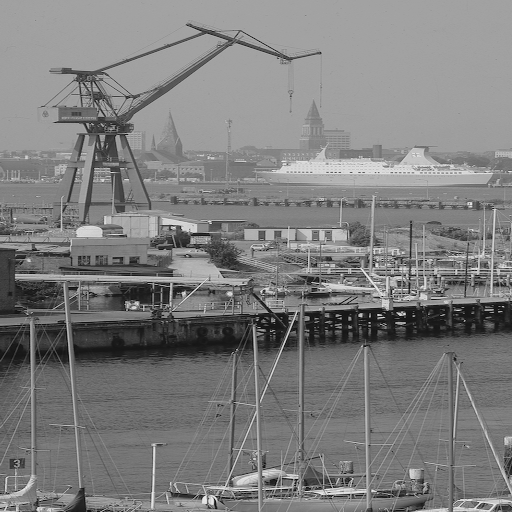

In [ ]:
img

<FONT FACE="times new roman" SIZE=4>
<h1><b>Expansión de constraste</b></h1>
A continuación, presentamos un histograma que muestra la intensidad inicial de la imagen, seguido de una expansión de contraste realizada sobre la misma. En primer lugar, utilizamos una fórmula para ajustarlo manualmente, y luego comparamos este método con la función $cv2.normalize()
$ proporcionada por la biblioteca $CV2$. De esta manera, podemos evaluar los resultados obtenidos por ambas técnicas.
</FONT>

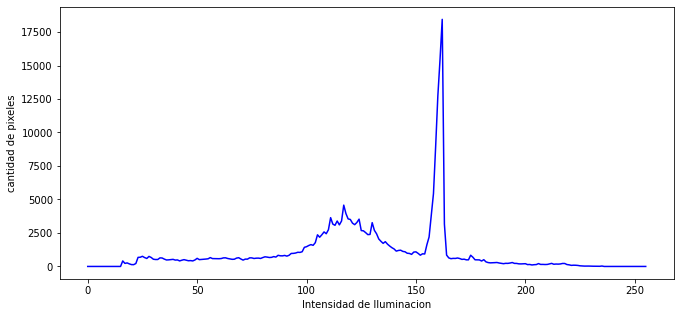

In [ ]:
img = np.asarray(img)
plt.figure(figsize=(11,5))
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='blue' )

plt.xlabel('Intensidad de Iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

<FONT FACE="times new roman">
<h2><b>Expansión manual</b></h2>
</FONT>

In [ ]:
# Declaramos los valores maximos y minimos con los que cuenta la imagen

valor_minimo = img.min()
valor_maximo = img.max()

imgExpa = ((img.copy())-valor_minimo) / (valor_maximo-valor_minimo)*256
imgExpa = imgExpa.astype(np.uint8)

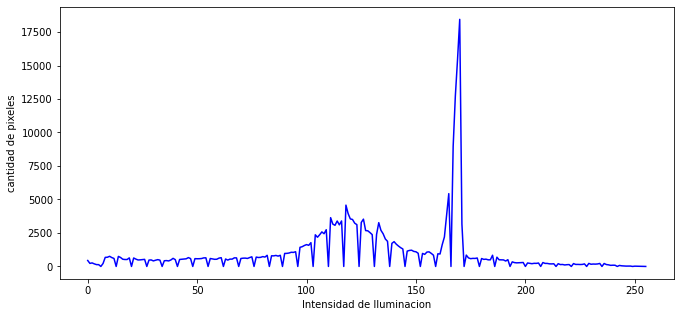

In [ ]:
plt.figure(figsize=(11,5))
hist = cv2.calcHist([imgExpa], [0], None, [256], [0, 256])
plt.plot(hist, color='blue' )

plt.xlabel('Intensidad de Iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

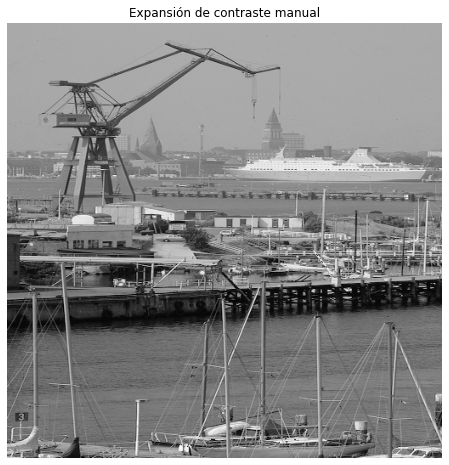

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(imgExpa, cmap='gray')
plt.title("Expansión de contraste manual")
plt.axis('off')
plt.show()

<FONT FACE="times new roman">
<h2><b>Expansión mediante CV2</b></h2>
</FONT>

In [ ]:
img_ex = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

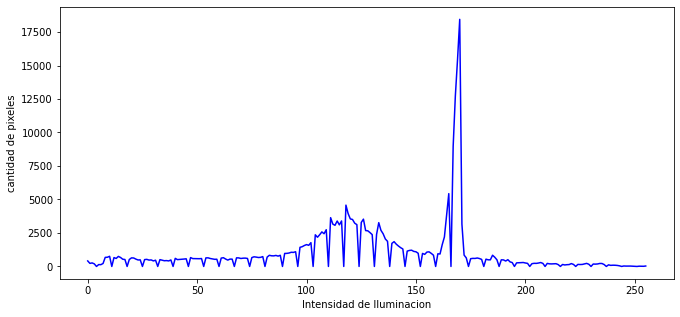

In [ ]:
plt.figure(figsize=(11,5))
hist = cv2.calcHist([img_ex], [0], None, [256], [0, 256])
plt.plot(hist, color='blue' )

plt.xlabel('Intensidad de Iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

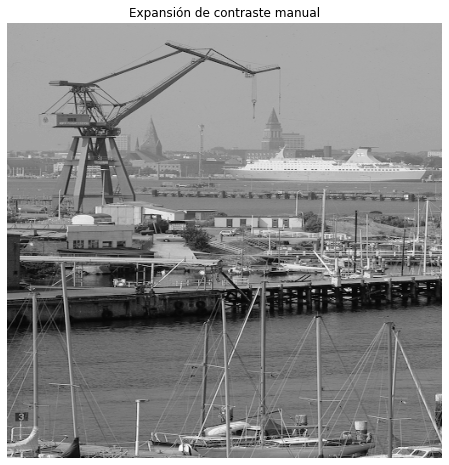

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(img_ex, cmap='gray')
plt.title("Expansión de contraste manual")
plt.axis('off')
plt.show()

<FONT FACE="times new roman" SIZE=4>
<h1><b>Ecualización del histograma</b></h1>
A continuación, presentamos un histograma que muestra la intensidad inicial de la imagen, seguido de una equializacion realizada sobre la misma. Esto mediante la función $cv2.equalizeHist()$ proporcionada por la biblioteca $CV2$. De esta manera, podemos evaluar los resultados obtenidos por ambas técnicas.
</FONT>

In [ ]:
imgEqua = cv2.equalizeHist(img)

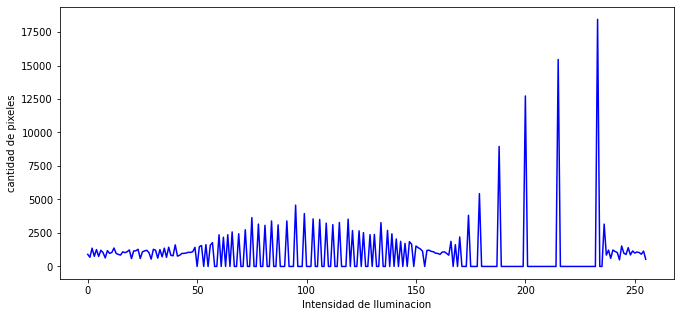

In [ ]:
plt.figure(figsize=(11,5))
hist = cv2.calcHist([imgEqua], [0], None, [256], [0, 256])
plt.plot(hist, color='blue' )

plt.xlabel('Intensidad de Iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

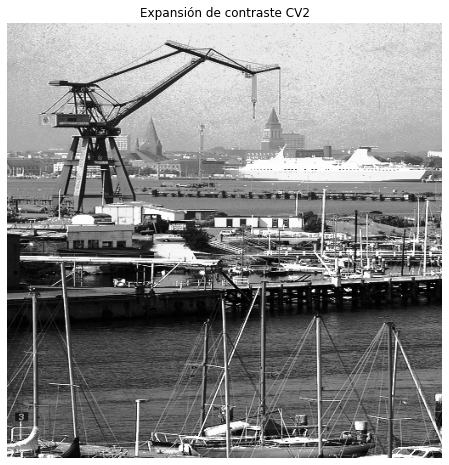

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(imgEqua, cmap='gray')
plt.title("Expansión de contraste CV2")
plt.axis('off')
plt.show()

<FONT FACE="times new roman" SIZE=4>
<h1><b>Similitudes y diferencias entre la expansión y ecualización</b></h1>
La expansión de contraste y la ecualización son técnicas de procesamiento de imagen que comparten la función de ajustar la distribución de los valores de píxeles. Sin embargo, mientras que la expansión de contraste aumenta la diferencia entre los valores de píxeles, la ecualización ajusta la distribución de los valores de píxeles para que estén uniformemente distribuidos. La expansión de contraste es más fácil de implementar y adecuada para imágenes con distribución no uniforme de valores de píxeles, pero puede resultar en pérdida de detalles en zonas de baja intensidad. La ecualización, aunque más compleja y requiere más tiempo de procesamiento, mejora la visualización de detalles en toda la imagen y es adecuada para imágenes con distribución uniforme de valores de píxeles.
</FONT>



<FONT FACE='times new roman' SIZE=4>
<h1><b>Función de transformación</b></h1>
A continuación, se presentará una función que tiene como objetivo invertir los valores de los píxeles de una imagen, con el fin de obtener una imagen con colores negativos. Para lograr esta transformación, se restará a cada valor de los píxeles el valor máximo de intensidad, que es 255.
</FONT>

In [ ]:
img_trans = 255 - img.copy()

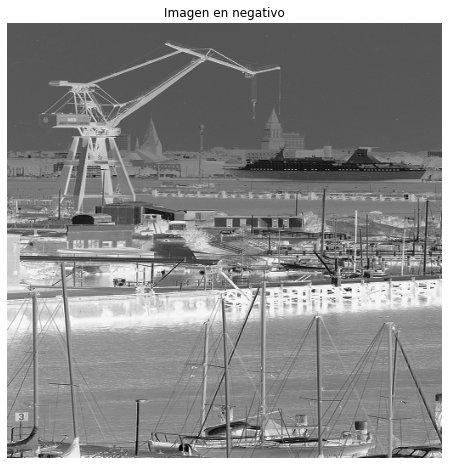

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(img_trans, cmap='gray')
plt.title("Imagen en negativo")
plt.axis('off')
plt.show()

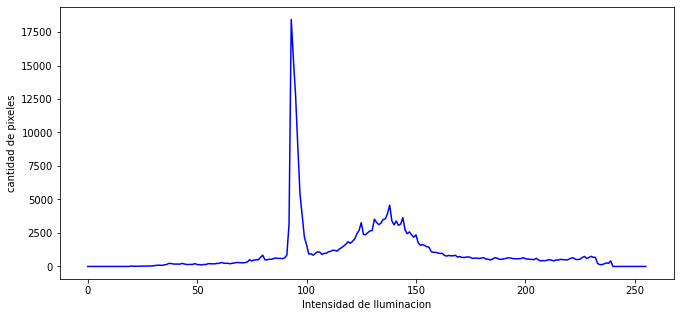

In [ ]:
plt.figure(figsize=(11,5))
hist = cv2.calcHist([img_trans], [0], None, [256], [0, 256])
plt.plot(hist, color='blue' )

plt.xlabel('Intensidad de Iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

<FONT FACE='times new roman' SIZE=4>
<h1><b>Analisis</b></h1>
Además de las evidentes diferencias visuales que se pueden apreciar, al generar el histograma de la imagen en escala de grises podemos notar que los valores y picos que estaban presentes inicialmente se han invertido, como si hubiéramos reflejado la imagen en un espejo.

Este resultado es de esperarse cuando se invierten los valores de los píxeles de una imagen en escala de grises. En lugar de tener altos valores en las zonas más claras de la imagen, ahora tendremos altos valores en las zonas más oscuras y viceversa. Por lo tanto, el histograma se invertirá reflejando este cambio.
</FONT>